<a href="https://colab.research.google.com/github/Nada-Seyam/sentiment-analysis-on-Hotel-reviews-dataset/blob/main/notebook4b0152e6e9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
organizations_datafiniti_hotel_reviews_path = kagglehub.dataset_download('organizations/datafiniti/hotel-reviews')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/7282_1.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 1. Find the correct file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename == 'Datafiniti_Hotel_Reviews.csv':
            file_path = os.path.join(dirname, filename)
            break  # Stop searching once the file is found

# 2. Load the dataset using the correct path
df = pd.read_csv(file_path)


In [ ]:
# Preprocessing
df = df[['reviews.text', 'reviews.rating']]
df.dropna(inplace=True)
df['sentiment'] = df['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)
df = df[['reviews.text', 'sentiment']]
df.columns = ['text', 'sentiment']

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', maxlen=100, truncating='post')

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'], test_size=0.2, random_state=42)


# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7089 - loss: 0.6224 - val_accuracy: 0.7190 - val_loss: 0.5499
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7554 - loss: 0.4874 - val_accuracy: 0.8280 - val_loss: 0.4038
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8550 - loss: 0.3758 - val_accuracy: 0.8460 - val_loss: 0.3569
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8886 - loss: 0.3000 - val_accuracy: 0.8465 - val_loss: 0.3575
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9075 - loss: 0.2604 - val_accuracy: 0.8425 - val_loss: 0.3837
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.3748
Test Loss: 0.3837067782878876
Test Accuracy: 0.8424999713897705


In [ ]:
example_review = "The hotel was amazing! Great service and beautiful rooms."
example_sequence = tokenizer.texts_to_sequences([example_review])
example_padded = pad_sequences(example_sequence, padding='post', maxlen=100)
prediction = model.predict(example_padded)
print(f"Sentiment prediction for '{example_review}': {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Sentiment prediction for 'The hotel was amazing! Great service and beautiful rooms.': 0.9866805672645569


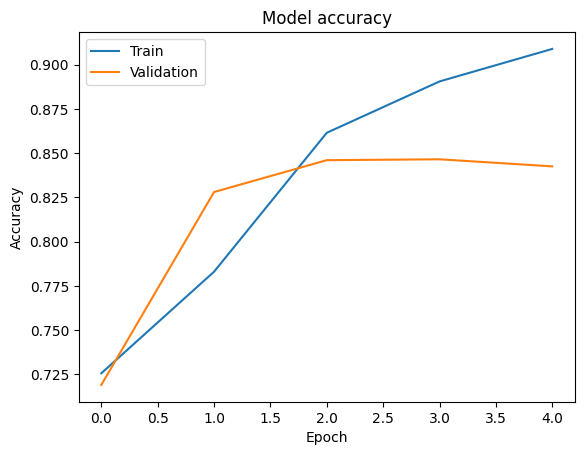

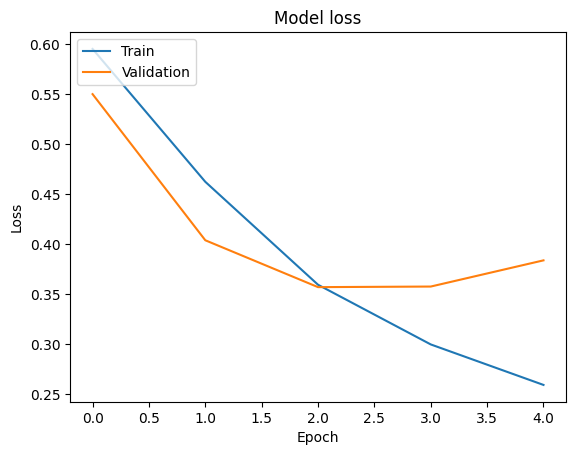

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()